In [2]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 11.5/11.5 MB 60.1 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Train.csv')

# Show the first few rows
print(df.head())

# Basic info
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0    Male   171.148359    86.185197              151/109   
1    Male   172.946206    79.641937              134/112   
2  Female   155.945488    49.167058              160/101   
3  Female   169.078298    56.017921               133/94   
4  Female   163.758355    73.966304              170/106   

   Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                 259.465814  29.423017                   157.652848   
1                 263.630292  26.626847                   118.507805   
2                 207.846206  20.217553                   143.587550   
3                 253.283779  19.595270                   137.448581   
4                 236.119899  27.582078                   145.328695   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  ...  \
0              0.132868          0.200000             58.786198  ...   
1              0.629534          0.267312             54.63527

# . EDA (Exploratory Data Analysis) & Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.histplot(df['Age (years)'], kde=True)  # Replace with your actual target
plt.title("Target Variable Distribution")
plt.show()

plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

# Pairplot for numerical features
sns.pairplot(df.select_dtypes(include='number'))
plt.show()


ModuleNotFoundError: No module named 'seaborn'

C:\Users\user\AppData\Local\Temp\ipykernel_17396\3099603029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette='Set2')


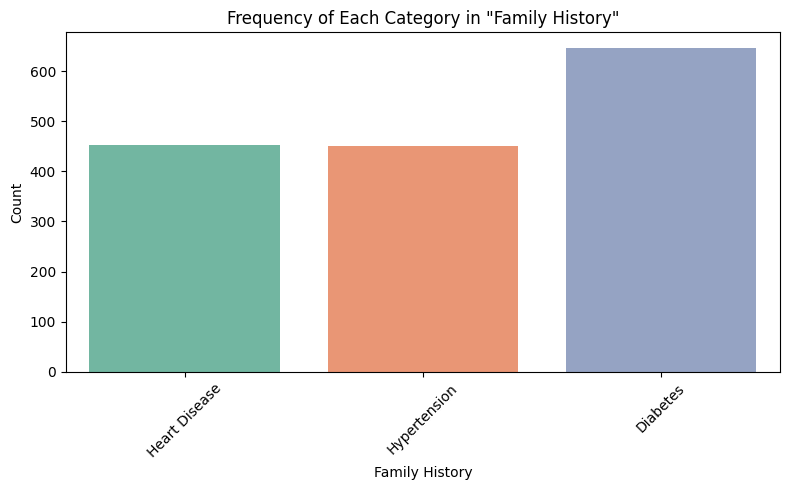

In [3]:
column_name = 'Family History'

# Plot the count of each category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')

plt.title(f'Frequency of Each Category in "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17396\3904925352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column_name, palette='Set2')


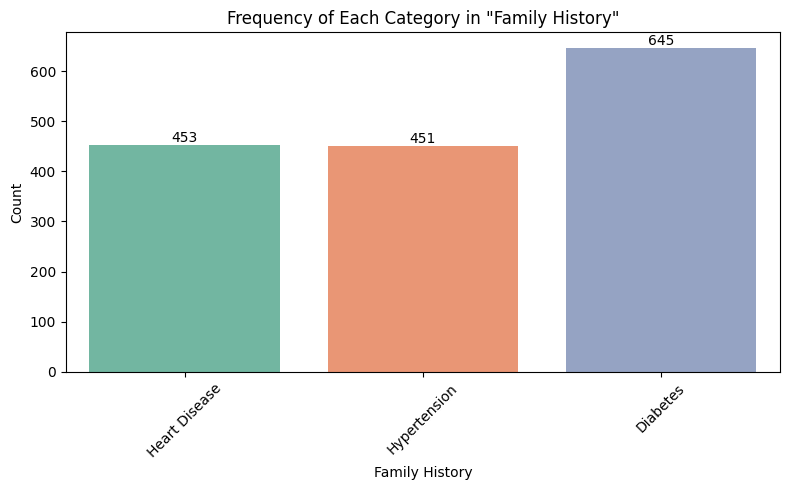

In [4]:

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x=column_name, palette='Set2')

# Add counts above bars
for container in ax.containers:
    ax.bar_label(container)

# Formatting
plt.title(f'Frequency of Each Category in "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  3. Handling Missing Values

In [5]:
# Count missing values
print(df.isnull().sum())

# Example strategies:
# 1. Drop rows
df_dropna = df.dropna()

# 2. Fill with mean (for numerical)
df_filled = df.fillna(df.mean(numeric_only=True))

# 3. Fill with mode (for categorical)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64


#  4. Encoding Categorical Variables

Run conda promt:

conda install -c conda-forge scipy

pip install statsmodels

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm



categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns



# --- 1. Handle Missing Values ---
# Fill numerical with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())



# Fill categorical with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])





# --- 2. Label Encoding ---
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform later if needed




# --- 3. Define Target and Features ---
target = 'Age (years)'
X = df.drop(columns=[target])
y = df[target]




# --- 4. Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# --- 5. Train with statsmodels for Adjustment ---
X_train_sm = sm.add_constant(X_train)  # Add intercept term
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())




# --- 6. Train Linear Regression with scikit-learn ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# --- 7. Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nModel Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R²   (R-squared):                {r2:.2f}")
print(f"MAPE (Mean Absolute % Error):    {mape:.2f}%")



                            OLS Regression Results                            
Dep. Variable:            Age (years)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1360.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        14:25:54   Log-Likelihood:                -7396.6
No. Observations:                2400   AIC:                         1.485e+04
Df Residuals:                    2374   BIC:                         1.500e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [8]:

X = df.drop(columns=['Age (years)'])
y = df['Age (years)']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Age (years)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1668.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        14:44:57   Log-Likelihood:                -9263.7
No. Observations:                3000   AIC:                         1.858e+04
Df Residuals:                    2974   BIC:                         1.874e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             